# Линейная регрессия

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm #библиотека для построения модели линейной регрессии
import numpy as np

bikes = pd.read_pickle('BikesDataVars.pkl')
bikes.head()

ModuleNotFoundError: No module named 'statsmodels.tsa.statespace'

In [ ]:

# объединим наши данные по неделям
#Сколько было арендовано велосипедов по неделям
bikes_sum = 
#Средняя температура по неделям
temp_mean = 
#Средняя влажность по неделям
humidity_mean = 
#Средняя скорость ветра по неделям
wind_mean = 
#Строим сводную таблицу
bikes_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)

In [ ]:
#Построим тепловую карту (sns.heatmap) для коэффициентов корреляции между параметрами. Есть ли сильные корреляции в датасете?


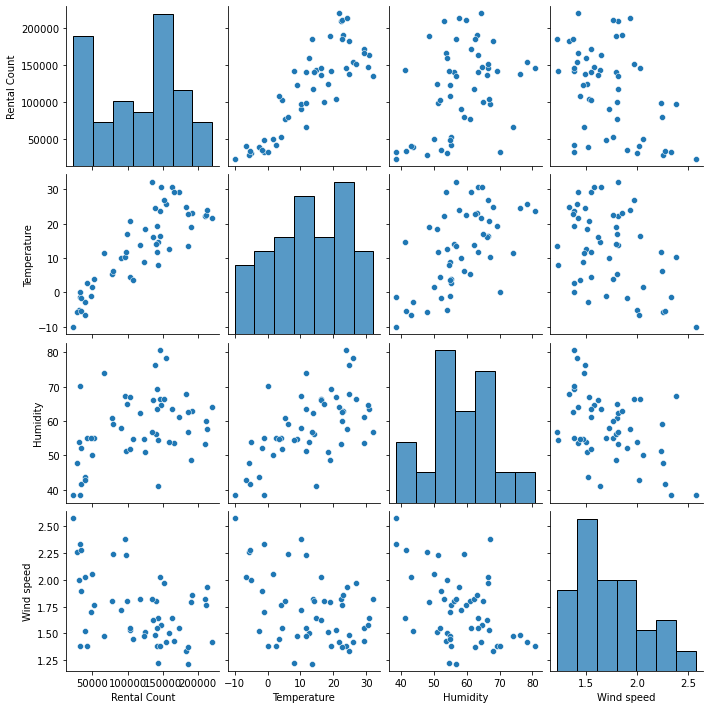

In [ ]:
#Визуально оценим наличие корреляции между параметрами. Корреляция между какими парамтерами является наиболее сильной?
sns.pairplot(bikes_weeks)

In [ ]:
#Воспользуемся библиотекой scipy.stats. Пусть X - температура, y - количество арендованных велосипедов. Найдите коэффициенты 
# линейной регрессии, выведите результат с помощью функции print 
X = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']

res = 
print(res)

LinregressResult(slope=4309.320603391841, intercept=61741.699243285024, rvalue=0.8458075200534891, pvalue=2.992184317240477e-15, stderr=384.3944103066581)


In [ ]:
#slope - угол наклона прямой, при изменении темературы на 1 градус кол-во аренд увеличивается на 4309. 
# intercept - значение для предиктора равного 0, где график пересекает ось Y. Другими словами - коэффициент b в лин-ом уравнении
# rvalue можно использовать для нахождения коэффициента детерминации (R^2)
# pvalue - статистическая значимость нашего коэффициента
# stderr - стандартная ошибка
# сделайте вывод о статистической значимости результатов (по p-value, обратите внимание на степень e-15)

In [ ]:
#вычислите коэффициент детерминации
# Насколько наша модель объясняет дисперсию целевой переменной?
r_sq = 
print(r_sq)

0.7153903609790334


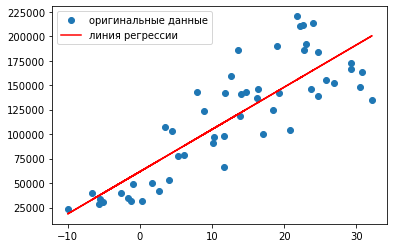

In [ ]:
#постройте график рассеивания изучаемых переменных, добавте на неё линию регрессии (красным цветом)
plt.plot(X, y, 'o', label='оригинальные данные')

plt.legend()
plt.show()

In [ ]:
#Поработаем с библиотекой  statsmodels.api

X_simple = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']
X_simple_constant = sm.add_constant(X_simple) # добавление свободного члена

mod = sm.OLS(y, X_simple_constant) #обратите внимание, в данной библиотеке указываем сначала y, потом X
res_simple = mod.fit()
print(res_simple.summary())
# Rental Count - целевая переменная

# Сравните результаты, полученные с помощью разных библиотек

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     125.7
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           2.99e-15
Time:                        06:14:38   Log-Likelihood:                -611.13
No. Observations:                  52   AIC:                             1226.
Df Residuals:                      50   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.174e+04   6596.057      9.360      

In [ ]:
# Построим линейную регрессию с несколькими предикторами.

X_mult = bikes_weeks.drop('Rental Count', axis=1) # удаляем зависимую переменную из дата фрейма
y = bikes_weeks['Rental Count']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant) # вместо одного предиктора указываем несколько
res_mult = mod.fit()
print(res_mult.summary())

# объясните строку coef    std err          t      P>|t|      [0.025      0.975]

# Сильно ли улучшился коэффициент детерминации после ввода дополнительных переменных?

# Что означает отрицательный coef для Humidity и Wind speed?

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     47.63
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.99e-14
Time:                        06:14:42   Log-Likelihood:                -607.91
No. Observations:                  52   AIC:                             1224.
Df Residuals:                      48   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.756e+05   4.61e+04      3.807      